# Naive Bayes

***

## Importando bibliotecas

In [36]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [37]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/Iris.csv')
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

### Separando o conjunto de dados

In [39]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Distribuição dos dados

Saber como as nossas variáveis se comportam é essencial para o classificador bayesiano, já que o classificador utiliza a distribuição de probabilidade $P(X|y)$ para fazer a classificação, precisamos entender o comportamento da distribuição para saber qual família de classificadores bayesianos iremos aplicar. 

Cada classificador utiliza uma suposição diferente da função $P(X|y)$:

[CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB) - Implementa o algoritmo de Naive Bayes categórico para dados distribuídos categoricamente.

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) - Implementa o algoritmo Gaussian Naive Bayes para classificação. A probabilidade das features é assumida como gaussiana.

[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) - Implementa o algoritmo Naive Bayes para dados multinomialmente distribuídos e é uma das duas variantes clássicas Naive Bayes usadas na classificação de texto.

[BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB) - Implementa o algoritmo Naive Bayes para dados que são distribuídos de acordo com distribuições multivariadas de Bernoulli; ou seja, pode haver várias features, mas cada um é assumido como uma variável de valor binário.

Mais detalhes [link](https://scikit-learn.org/stable/modules/naive_bayes.html#).

Como selecionar:

- Features categóricas: CategoricalNB
- Features contínuas: GuassianNB
- Distribuições com features discretas, ou uma contagem (0, 1, 2, 3, ...): MultinomialNB ou ComplementNB
- Para features como distribuições de Bernoulli: BernoulliNB

### Representação gráfica da distribuição

O gráfico de estimativa de densidade de kernel (***kernel density estimate*** - KDE) é um método para visualizar a distribuição de observações em um conjunto de dados, análogo a um histograma. O KDE representa os dados usando uma curva de densidade de probabilidade contínua em uma ou mais dimensões.

[LINK](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Text(0.5, 1.0, 'PetalWidthCm')

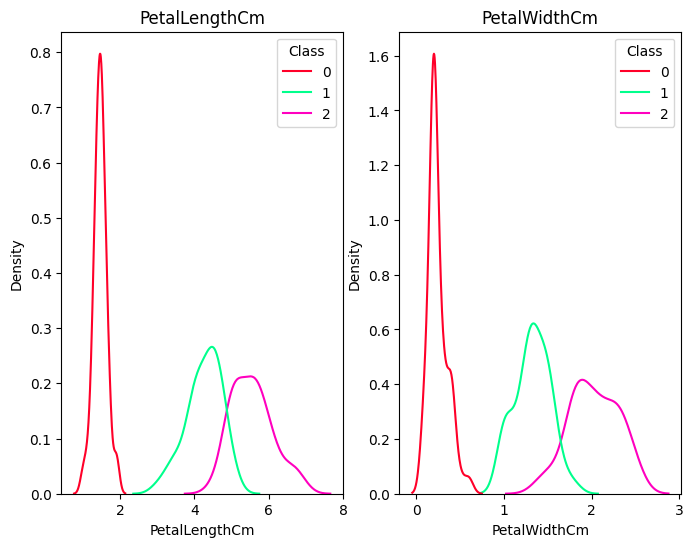

In [40]:
plot_data = X
plot_data["Class"] = y

fig, ax = plt.subplots(1,2, figsize=(8,6))

sns.kdeplot(data=plot_data, x="PetalLengthCm", hue="Class", palette='gist_rainbow', ax=ax[0])
ax[0].set_title("PetalLengthCm")

sns.kdeplot(data=plot_data, x="PetalWidthCm", hue="Class", palette='gist_rainbow', ax=ax[1])
ax[1].set_title("PetalWidthCm")

No nosso caso, as distribuições se assemelham a uma distribuição normal. Portanto vamos utilizar o $GuassianNaiveBayes$.

In [41]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

### Treinamento do modelo

GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



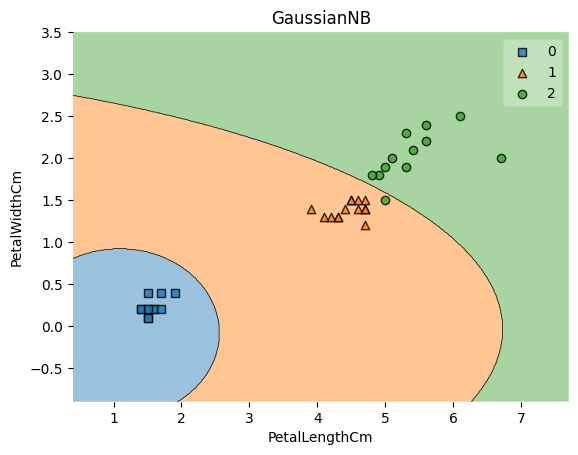

BernoulliNB
              precision    recall  f1-score   support

           0       0.32      1.00      0.48        12
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        12

    accuracy                           0.32        38
   macro avg       0.11      0.33      0.16        38
weighted avg       0.10      0.32      0.15        38



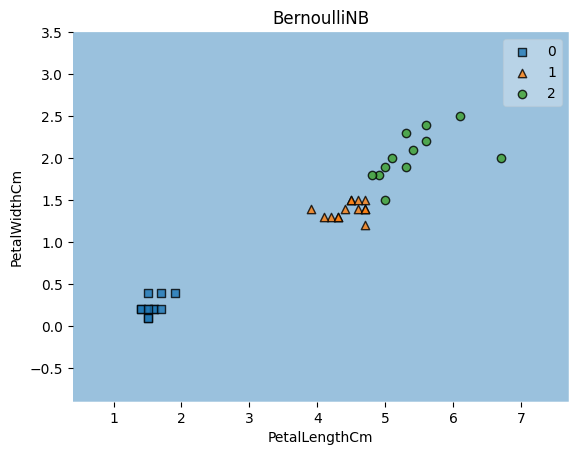

MultinomialNB
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.00      0.00      0.00        14
           2       0.46      1.00      0.63        12

    accuracy                           0.61        38
   macro avg       0.46      0.64      0.52        38
weighted avg       0.44      0.61      0.49        38



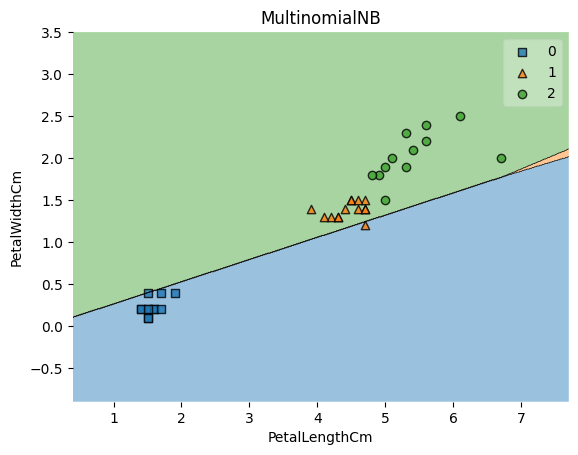

In [42]:
# Comportamento de diferentes modelos 

names = ["GaussianNB", "BernoulliNB", "MultinomialNB"]

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB()]

count = 0

for nome, clf in zip(names, classifiers):
  model = clf
  #treinando o modelo
  model.fit(X_train, y_train)

  #predição
  y_pred = model.predict(X_test) #armazena as previsões do modelo
  proba = model.predict_proba(X_test) #armazena as probabilidades previstas para cada classe.

  #Resultados do classificador
  print(nome)
  # print(proba)
  print(classification_report(y_test, y_pred))
  show_decision_region(X_test, y_test, model)